# **<ins style="color:aqua">Feature Engineering</ins>**
## **<ins style="color:green">Handling Missing Values</ins>**
1. ### **<ins style="color:red">(CCA : Complete Case Analysis)</ins>**
   - Remove Hole Row in which NaN value present.
   - Data missing must be random.
   - Complete Case Analysis(CCA), also called "List-Wise Deletion" of cases, consists in discarding observations(Row) where values in any of the variables(Column) are missing.
   - Complete Case Analysis means literally analyzing only those observations for which there is information in all of the variables in the dataset.
   - __Assumption For CCA:__ MCAR : Missing Completely at Random
   - __Advantage__ :
     - Easy to implement as no data manipulation required.
     - Preserves variable distribution (if data is MCAR), then the distribution of the variables of the reduced dataset should match the distribution in the original dataset.
   - __Disadvantage__:
     - It can exclude a large fraction of the original dataset (If mising data is abundant).
     - Excluded observations could be informative for the analysis (if data is not missing at random).
     - When using our models in production, the model will not know how to handle missing data.
   - __When to use CCA.__
     - MCAR : Missing Completely At Random
     - Percentage of the Missing data in column should be high. If percentage of missing data in a column is low then do not apply CCA.

3. ### **<ins style="color:red">Impute(Fill NaN Value)</ins>**
   - #### **Univariate** : _SimpleImputer_ Class Present in Scikit Learn for the _Univariate_.
     - <ins style="color:blue"> __Numerical Type Column__ </ins>
       - Method to fill the Numerical Columns Missing Values.
         - Mean
         - Median
         - Random Value
         - End of Distribution Value
     - <ins style="color:blue"> __Categorical Type Column__ </ins>
       - Method to fill the Categorical Columns Missing Values.
         - Mode
         - Missing Word
   - #### **Multivariate**
     - __KNN Imputer__ Method
     - __Iterative Imputer__ Method
- __Missing Indicator__

### **<ins style="color:red">(CCA : Complete Case Analysis)</ins>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [3]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

- **The missing percentage of data is describe to where to use CCA.**
  - city_development_inde(2.50%) : CCA Apply
  - gender(23.53%) : CCA Not Apply
  - enrolled_university(2.01%) : CCA Apply
  - education_level(2.40%) : CCA Apply
  - major_discipline(14.68%) : CCA Not Apply
  - experience(0.33%) : CCA Apply
  - company_size(30.99%) : CCA Not Apply
  - training_hours(32.04%) : CCA Not Apply
  - training_hours(3.99%) : CCA Apply

In [5]:
df.shape

(19158, 13)

In [6]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
1532,0.920,no_enrollment,Graduate,9.0,47.0
17210,0.624,no_enrollment,Graduate,5.0,109.0
5196,0.890,Part time course,Graduate,8.0,108.0
5030,0.897,no_enrollment,Graduate,17.0,51.0
13657,0.920,no_enrollment,Graduate,14.0,13.0


In [8]:
(len(df[cols].dropna())/len(df))*100

89.68577095730244

In [9]:
ndf = df[cols].dropna()
df.shape, ndf.shape

((19158, 13), (17182, 5))

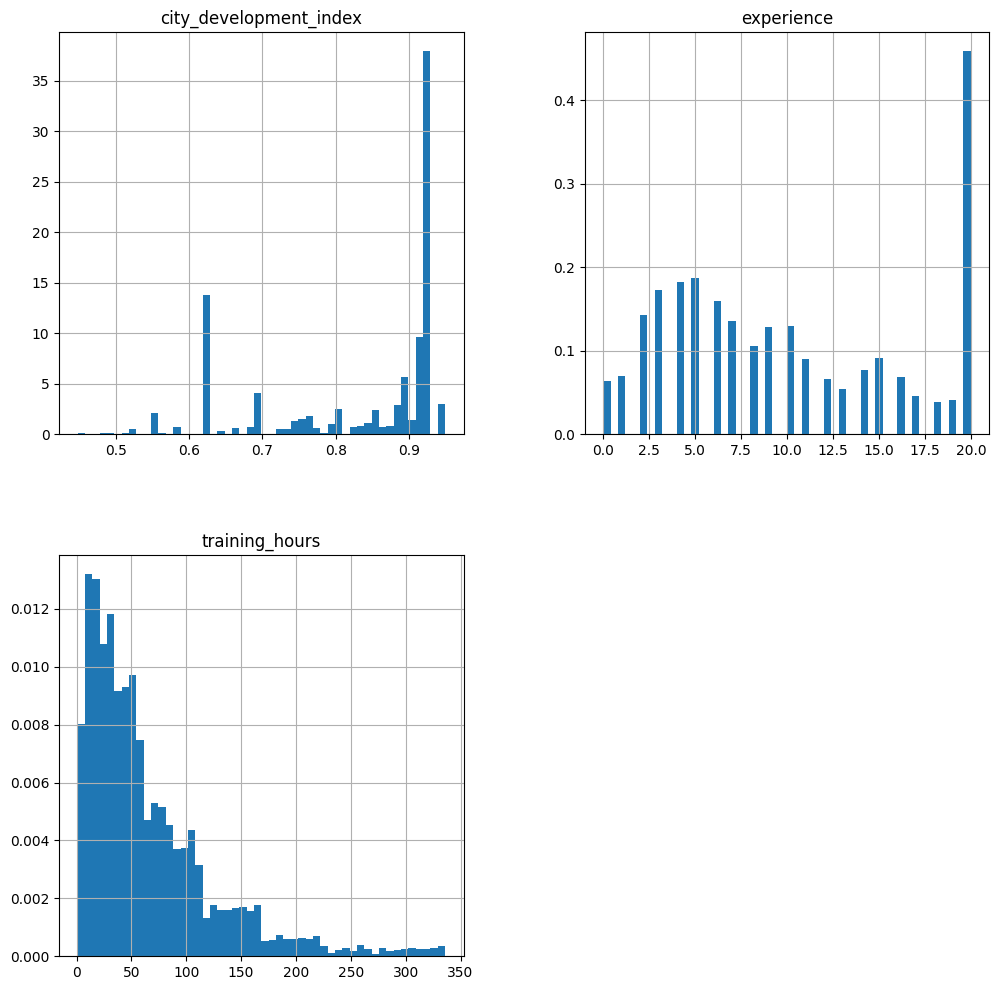

In [10]:
ndf.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

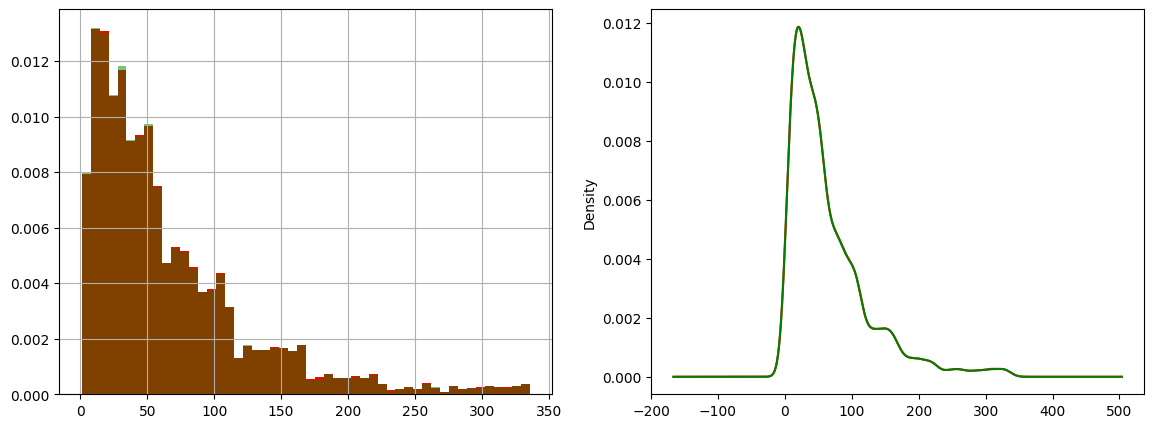

In [11]:
## indivisual analysis of distribution
# training_hours
fig = plt.figure(1, figsize=(14, 5))

ax = fig.add_subplot(121)

# original data
df['training_hours'].hist(bins=50, density=True, color='red')

# data after CCA, the argument alpha makes the color transparent, so we can see the overlay of the distributions
ndf['training_hours'].hist(bins=50, ax=ax, density=True, color="green", alpha=0.5)

# ---------------------------------------------------------
ax = fig.add_subplot(122)

# original data
df['training_hours'].plot.density(color='red')

# data after CCA
ndf['training_hours'].plot.density(color='green')
plt.show()

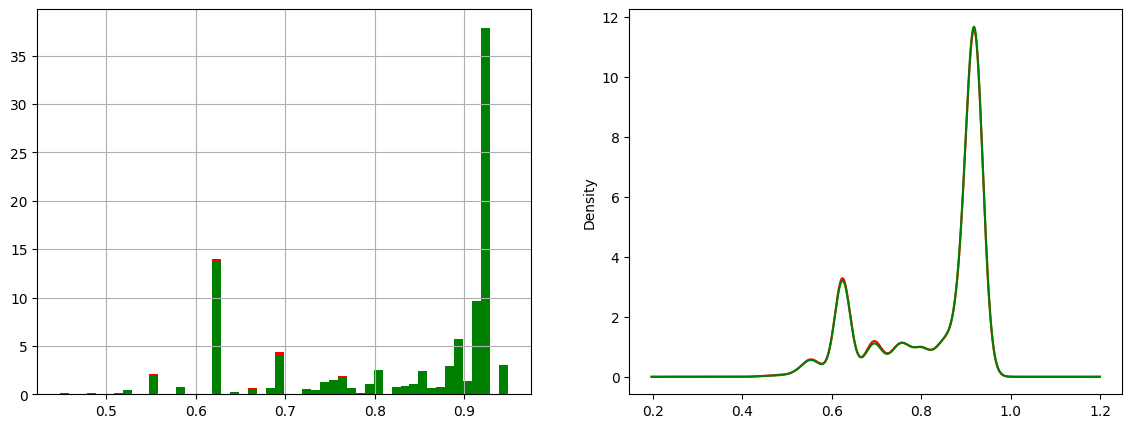

In [12]:
# city_development_index
fig = plt.figure(1, figsize=(14, 5))

ax = fig.add_subplot(121)
# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after CCA, the argument alpha makes the color transparent, so we can see the overlay of the 2 distribution
ndf['city_development_index'].hist(bins=50, ax=ax, density=True, color='green')

# ---------------------------------------------------------------------------------------
ax = fig.add_subplot(122)
# original data
df['city_development_index'].plot.density(color='red')

# data after CCA
ndf['city_development_index'].plot.density(color='green')

plt.show()


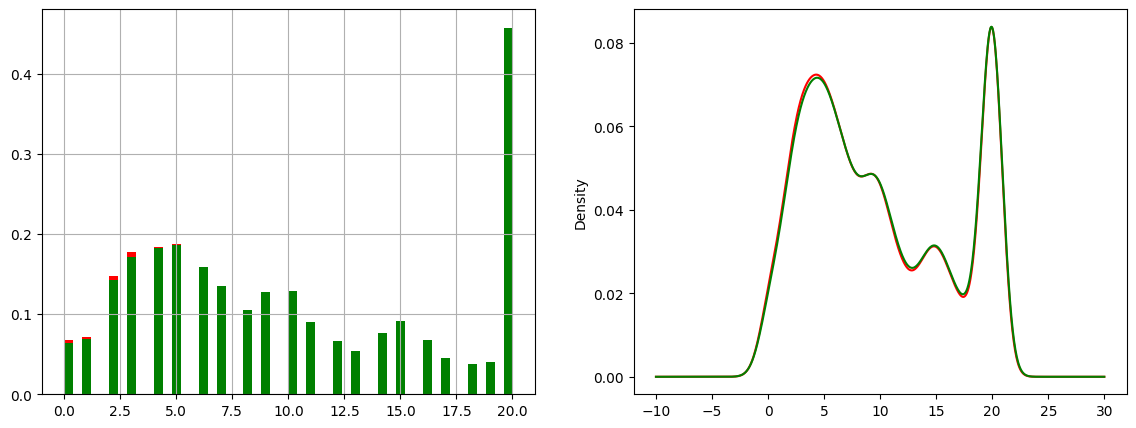

In [13]:
# experience
fig = plt.figure(1, figsize=(14, 5))

ax = fig.add_subplot(121)
# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after CCA, the argument alpha makes the color transparent, so we can see the overlay of the 2 distribution
ndf['experience'].hist(bins=50, ax=ax, density=True, color='green')

# ---------------------------------------------------------------------------------------
ax = fig.add_subplot(122)
# original data
df['experience'].plot.density(color='red')

# data after CCA
ndf['experience'].plot.density(color='green')

plt.show()


In [14]:
# the ratio of categorical column must be same after CCA
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [15]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [16]:
# enrolled_university
temp = pd.concat([
    # percentage of observations per category, original data
    df['enrolled_university'].value_counts() / len(df),
    # percentage of observations per category, CCA data
    ndf['enrolled_university'].value_counts() / len(ndf)
], axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [17]:
# education_level
temp = pd.concat([
    # percentage of observations per category, original data
    df['education_level'].value_counts() / len(df),
    # percentage of observations per category, CCA data
    ndf['education_level'].value_counts() / len(ndf)
], axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
